Esketit
---

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [33]:
df = pd.read_csv('data/politics_w_lix_sentiment.csv', index_col = 'comment_id')
df.head(2)

,created_date,subreddit_id,search_query,post_id,post_title,comment_original,comment_processed,comment_no_stopwords,upvotes,post_url,comment_url,lix_score,sentiment_score
comment_id,,,,,,,,,,,,,
lu0s0st,2024-10-27 15:32:33,politics,Israel,1gdcy25,Bernie Sanders to voters skipping presidential...,"News flash, Trump is worse on every single vot...","news flash, trump is worse on every single vot...","news flash, trump worse every single voting is...",8981,https://www.reddit.com/r/politics/comments/1gd...,https://www.reddit.com/r/politics/comments/1gd...,3.250000,-0.230769
lu0nkvc,2024-10-27 15:08:10,politics,Israel,1gdcy25,Bernie Sanders to voters skipping presidential...,Protest non-voters are some of the worst type ...,protest non voters are some of the worst type ...,protest non voters worst type privileged peopl...,4186,https://www.reddit.com/r/politics/comments/1gd...,https://www.reddit.com/r/politics/comments/1gd...,40.104651,-0.162791


In [ ]:
pre_path = 'data/'
suffix = '_w_lix_sentiment.csv'
subreddits = ['Israel','Palestine', 'politics', 'worldnews']
dfs = [pd.read_csv(pre_path + sub + suffix, index_col = 'comment_id') for sub in subreddits]

In [39]:
for sub in subreddits:

    #### Get the needed data and do log transformation of upvotes
    #define columns for clustering
    attribute_cols = ['sentiment_score', 'lix_score','upvotes']

    #Create the new daraframe for clustering
    df_cluster = df[attribute_cols].copy()

    df_cluster['upvotes'] = df_cluster['upvotes'].apply(lambda x: np.log(x)) #We should prove why we do this by plotting the data i guess, but we will save that for later

    #Standardize the data
    scaler = StandardScaler()
    df_cluster_scaled = scaler.fit_transform(df_cluster)


    #Apply clustering using tuned hyperparameters
    n_clusters = 3

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(df_cluster_scaled)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    kmeans.fit(df_cluster_scaled)

    dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
    dbscan.fit(df_cluster_scaled)


    #### Add the cluster labels to the dataframe
    df['hierarchical_cluster'] = hierarchical.labels_
    df['kmeans_cluster'] = kmeans.labels_
    df['dbscan_cluster'] = dbscan.labels_

    #### Export the new dataframes
    df.to_csv(f'data/{sub}_clustered.csv')


In [41]:
dt = pd.read_csv('data/politics_clustered.csv', index_col = 'comment_id')
dt.head(2)

,created_date,subreddit_id,search_query,post_id,post_title,comment_original,comment_processed,comment_no_stopwords,upvotes,post_url,comment_url,lix_score,sentiment_score,hierarchical_cluster,kmeans_cluster,dbscan_cluster
comment_id,,,,,,,,,,,,,,,,
lu0s0st,2024-10-27 15:32:33,politics,Israel,1gdcy25,Bernie Sanders to voters skipping presidential...,"News flash, Trump is worse on every single vot...","news flash, trump is worse on every single vot...","news flash, trump worse every single voting is...",8981,https://www.reddit.com/r/politics/comments/1gd...,https://www.reddit.com/r/politics/comments/1gd...,3.250000,-0.230769,2,0,-1
lu0nkvc,2024-10-27 15:08:10,politics,Israel,1gdcy25,Bernie Sanders to voters skipping presidential...,Protest non-voters are some of the worst type ...,protest non voters are some of the worst type ...,protest non voters worst type privileged peopl...,4186,https://www.reddit.com/r/politics/comments/1gd...,https://www.reddit.com/r/politics/comments/1gd...,40.104651,-0.162791,2,0,-1


Scatterplots
---

In [ ]:
# Create a figure with 3 scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for sentiment_score vs lix_score
sns.scatterplot(ax=axes[0], x='sentiment_score', y='lix_score', data=df_cluster)
axes[0].set_title('Sentiment Score vs Lix Score')

# Scatter plot for sentiment_score vs upvotes
sns.scatterplot(ax=axes[1], x='sentiment_score', y='upvotes', data=df_cluster)
axes[1].set_title('Sentiment Score vs Upvotes')

# Scatter plot for lix_score vs upvotes
sns.scatterplot(ax=axes[2], x='lix_score', y='upvotes', data=df_cluster)
axes[2].set_title('Lix Score vs Upvotes')

plt.tight_layout()
plt.show()

3D Scatterplots
---

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,6), subplot_kw={'projection':'3d'})
ax.scatter(df_cluster_scaled[:, 0], df_cluster_scaled[:, 1], df_cluster_scaled[:, 2], facecolors='none', edgecolors='b')
# ax.scatter(df_cluster.to_numpy()[:, 0], df_cluster.to_numpy()[:, 1], df_cluster.to_numpy()[:, 2], facecolors='none', edgecolors='b')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Lix Score')
ax.set_title('3D Scatter Plot')
# ax.text2D(0.05, 0.95, "Log-transformed upvotes on the z axis", transform=ax.transAxes)

plt.tight_layout()

Hyperparameter tuning
---

In [ ]:
# Determine the optimal number of clusters with the Elbow Method
knn_inertia = []
hier_inertia = []
DBSCAN_inertia = []

K_range = range(1, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    # hierarchical = AgglomerativeClustering(n_clusters=k)
    # hierarchical.fit(df_cluster_scaled)
    knn_inertia.append(kmeans.inertia_)
    # hier_inertia.append(hierarchical.inertia_)

# Plot the elbow curve
elbow_fig = go.Figure()
elbow_fig.add_trace(go.Scatter(x=list(K_range), y=knn_inertia, name = 'KNN', mode='lines+markers', marker=dict(color='blue')))
# elbow_fig.add_trace(go.Scatter(x=list(K_range), y=hier_inertia, name = 'Hierachical', mode='lines+markers', marker=dict(color='blue')))

elbow_fig.update_layout(
    title="Elbow Method for Optimal k",
    xaxis_title="Number of Clusters (k)",
    yaxis_title="Inertia (Sum of Squared Distances)",
)
elbow_fig.show()


Plot clusters in 3-d space
---

Text(0.5, 0.92, 'DBSCAN')

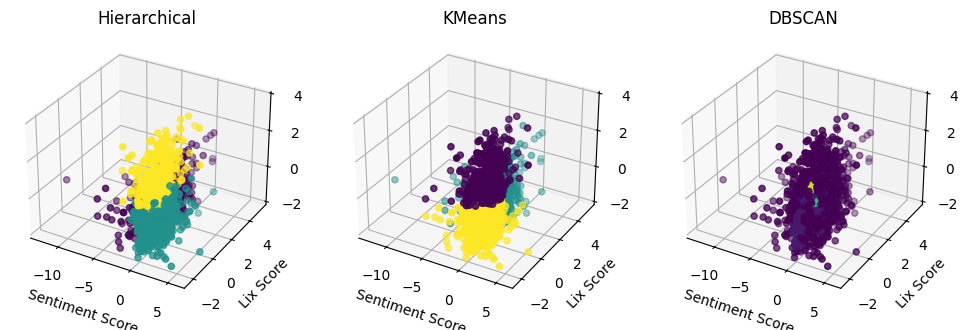

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(12,8), subplot_kw={'projection':'3d'})
for ax in axs:
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel('Lix Score')

axs[0].scatter(df_cluster_scaled[:,0], df_cluster_scaled[:,1], df_cluster_scaled[:,2], c=hierarchical.labels_)
axs[0].set_title("Hierarchical")

axs[1].scatter(df_cluster_scaled[:,0], df_cluster_scaled[:,1], df_cluster_scaled[:,2], c=kmeans.labels_)
axs[1].set_title("KMeans")

axs[2].scatter(df_cluster_scaled[:,0], df_cluster_scaled[:,1], df_cluster_scaled[:,2], c=dbscan.labels_)
axs[2].set_title("DBSCAN")

